<a href="https://colab.research.google.com/github/honor200/honor-diss/blob/main/SImple_model_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-17 15:20:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-17 15:20:39 (88.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
import pandas as pd
df = pd.read_csv('aft.csv')
df.drop(['provenance','notes','source','data_source','date_obtained'], axis = 1, inplace = True)

In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'atu_id'.
df['atu_id']= label_encoder.fit_transform(df['atu_id'])

df['atu_id'].unique()

array([170,  38, 174,  47, 114,  95,   9, 111, 116,  82,  41, 164,  21,
        99, 132, 103,  62,  37,  20,  39, 119, 109,  73,  74,  75,  76,
        77,  78,  83,  80,  81, 173, 128, 129,  46, 113,  87,   3, 138,
         7, 110, 102,   8,  10,  11,  12,  13,  69,  55,  54,  58,  57,
        16,  53, 126, 167, 131,  49, 154,  19,  18, 155,   4, 140,  40,
       121, 122, 117,  94,  61, 148, 108,  52, 127, 145, 158, 176,  25,
       106, 142, 137, 118, 120,  24,  34,  45, 107,  42, 143, 171, 123,
        68,  71,  96,  14, 104, 161, 169,  23,  91, 150,  50,   5, 124,
        48, 160,   1, 151, 177, 178, 179, 180,  60,  43,  88,  89,  36,
        90,   0,  51, 147, 130, 136, 101, 181, 175, 134,  93,   6, 100,
        26,  84, 115,  28, 149, 105, 112,  64,  44,  97,  65, 162, 168,
        67,  15,  17, 133, 172,  85,  92,  35,  79,  59, 156,  66,  56,
       139,  86, 157,   2, 165,  30,  29, 166,  31,  32, 125,  98,  27,
        33, 163, 152,  22, 141,  70, 146,  63,  72, 135, 144, 15

## Solving Imbalance Issues

Class=170, n=6 (0.395%)
Class=38, n=19 (1.252%)
Class=174, n=10 (0.659%)
Class=47, n=6 (0.395%)
Class=114, n=19 (1.252%)
Class=95, n=11 (0.725%)
Class=9, n=9 (0.593%)
Class=111, n=8 (0.527%)
Class=116, n=15 (0.988%)
Class=82, n=4 (0.264%)
Class=41, n=2 (0.132%)
Class=164, n=12 (0.791%)
Class=21, n=5 (0.329%)
Class=99, n=1 (0.066%)
Class=132, n=10 (0.659%)
Class=103, n=8 (0.527%)
Class=62, n=3 (0.198%)
Class=37, n=8 (0.527%)
Class=20, n=13 (0.856%)
Class=39, n=5 (0.329%)
Class=119, n=10 (0.659%)
Class=109, n=12 (0.791%)
Class=73, n=1 (0.066%)
Class=74, n=5 (0.329%)
Class=75, n=13 (0.856%)
Class=76, n=5 (0.329%)
Class=77, n=8 (0.527%)
Class=78, n=2 (0.132%)
Class=83, n=15 (0.988%)
Class=80, n=1 (0.066%)
Class=81, n=2 (0.132%)
Class=173, n=4 (0.264%)
Class=128, n=21 (1.383%)
Class=129, n=26 (1.713%)
Class=46, n=4 (0.264%)
Class=113, n=16 (1.054%)
Class=87, n=12 (0.791%)
Class=3, n=11 (0.725%)
Class=138, n=18 (1.186%)
Class=7, n=15 (0.988%)
Class=110, n=7 (0.461%)
Class=102, n=10 (0.659%)


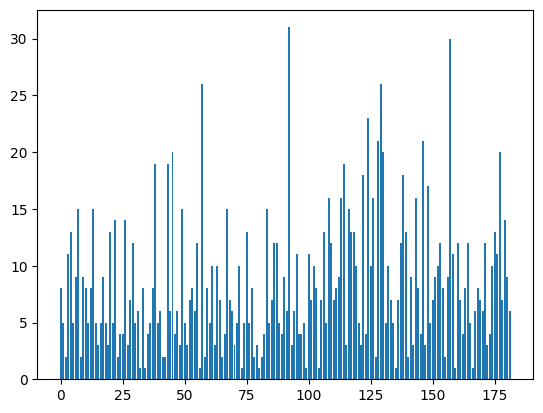

In [ ]:
# Finding the distribution of each class

from collections import Counter
from matplotlib import pyplot

# split into input and output elements
X, y = df['text'], df['atu_id']

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

 # plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
# Oversamplign the dataset
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

ValueError: ignored

In [ ]:
df_shuffled = df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
df_shuffled.head()

,atu_id,tale_title,text
142,3,The Story of the Simpleton Husband,There was once in olden time a foolish man and...
6,4,Day-Dreaming,Now there was once a man at Bagdad who had sev...
97,6,Of Hearing Good Counsel,"An archer, catching a little bird called a nig..."
60,19,The Story of the Little Red Hen,There was once a little red hen. She was scrat...
112,2,On the Blind Men and the Affair of the Elephant,"There was a great city in the country of Ghur,..."


In [ ]:
train_df = df_shuffled[:int(len(df_shuffled)*0.8)]
test_df = df_shuffled[int(len(df_shuffled)*0.8):]

In [ ]:
train_df.tail()

,atu_id,tale_title,text
166,26,The Seven Doves,There was once in the county of Arzano a good ...
72,23,Don Giovanni de la Fortuna,One day he was walking down a broad road when ...
220,16,What Have You Got There?,Two playfellows place their clenched fists one...
134,8,A Young Monk Wanted to Have a Goose,A hermit once took a young monk to the city. H...
204,13,The Transformed Mouse Seeks a Bridegroom (Panc...,On the shore of the Ganges there was a hermita...


In [ ]:
test_df.head()

,atu_id,tale_title,text
230,27,"Fair, Brown, and Trembling","King Aedh Cúrucha lived in Tir Conal, and he h..."
63,0,The Cat of Norrhult,"On the estate of Norrhult, in the parish of Ru..."
54,19,The Ant and the Grasshopper (Jacobs),"'Why not come and chat with me,' said the gras..."
107,30,The Swineherd,There was once a poor prince; he had only a ti...
50,19,An Ant and a Grasshopper,As the ants were airing their provisions one w...


In [ ]:
len(test_df), len(train_df), len(df_shuffled)

(50, 200, 250)

In [ ]:
len(df['atu_id'].unique())

34

In [ ]:
df['atu_id'].value_counts()

27    21
4     19
24    18
25    15
1     13
11    13
30    12
19    11
29    10
18    10
26    10
0      9
13     8
23     8
3      8
21     7
7      6
12     5
10     5
31     5
5      5
2      5
17     4
32     4
28     4
8      3
6      2
14     2
16     2
33     2
22     1
9      1
20     1
15     1
Name: atu_id, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"].to_numpy(),
                                                                            train_df["atu_id"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [ ]:
train_labels_one_hot = lb.fit_transform(train_labels)
val_labels_one_hot = lb.transform(val_labels)

In [ ]:
train_labels.shape, val_labels.shape

((180,), (20,))

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)
#takes 1/10 training data and creates validation data

(180, 180, 20, 20)

In [ ]:
train_sentences[:10], train_labels[:10]

(array(["Once upon a time there was a merchant who had three daughters. It so happened he had one day to go to strange countries to buy wares, and so he asked his daughters, 'What shall I bring you from beyond the seas?' The eldest asked for a new coat, and the next one also asked for a new coat; but the youngest one only took a sheet of paper and sketched a flower on it. 'Bring me, bátyushka [father], a flower like this!' So the merchant went and made a long journey to foreign kingdoms, but he could never see such a flower. So he came back home, and he saw on his way a splendid lofty palace with watchtowers, turrets, and a garden. He went a walk in the garden, and you cannot imagine how many trees he saw and flowers, every flower fairer than the other flowers. And then he looked and he saw a single one like the one which his daughter had sketched. 'Oh,' he said, 'I will tear off and bring this to my beloved daughter; evidently there is nobody here to watch me.' So he ran up and broke 

In [ ]:
train_df.head()

,atu_id,tale_title,text
142,3,The Story of the Simpleton Husband,There was once in olden time a foolish man and...
6,4,Day-Dreaming,Now there was once a man at Bagdad who had sev...
97,6,Of Hearing Good Counsel,"An archer, catching a little bird called a nig..."
60,19,The Story of the Little Red Hen,There was once a little red hen. She was scrat...
112,2,On the Blind Men and the Affair of the Elephant,"There was a great city in the country of Ghur,..."


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

993

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 820 # max length our sequences will be

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
import random
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

#any 0s at the end are just filling in the 820 (av length) if the tale is less than 820 words.

Original text:
So late one evening he came to a great forest. He did not know where he should find a shelter for the night, but he went on looking and searching till he caught sight of an old tumble-down hut, which stood in the middle of some bushes. It was not exactly good enough for such a fine cavalier, but when you cannot get what you want you must take what you can get. And, since there was no help for it, he went into the hut. Not a living soul was to be seen; there was not even a stool to sit upon, but alongside the wall stood a big chest. What could there be inside that chest? If only there were some bits of moldy bread in it! How nice they would taste! For, you must know, he had not had a single bit of food the whole day, and he was so hungry and his stomach so empty that it groaned with pain. He lifted the lid. but inside the chest there was another chest, and inside that chest there was another; and so it went on, each one smaller than the other, until they became quite tiny

<tf.Tensor: shape=(1, 820), dtype=int64, numpy=
array([[  26,  765,   33,  231,    6,   50,    4,    5,  134,  273,    6,
          74,   27,  148,   73,    6,  147,  173,    5,  883,   19,    2,
         157,   23,    6,   41,   24,  409,    3, 4416,  226,    6,  610,
         445,    7,   64,   81, 2470, 1035,   60,  250,   11,    2,  711,
           7,   84, 1813,   16,   10,   27,  649,  104,  326,   19,  117,
           5,  251, 5330,   23,   30,   14,  431,  128,   47,   14,  175,
          14,   99,   98,   47,   14,  102,  128,    3,  444,   40,   10,
          59,  362,   19,   16,    6,   41,   48,    2, 1035,   27,    5,
         859,  957,   10,    4,   42,  259,   40,   10,   27,  256,    5,
        1457,    4,  434,  110,   23, 2815,    2,  566,  250,    5,  274,
         653,   47,   62,   40,   42,  426,   13,  653,   53,  126,   40,
          46,   84, 3979,    7, 4696,  450,   11,   16,   95, 1222,   18,
          55, 2226,   19,   14,   99,  148,    6,   21,   27,   

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=256, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

#creates a map of how similar each word is to the others

In [ ]:
#BASELINE MODEL

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 15.00%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([24, 27, 27, 27, 27, 24, 27, 27, 24,  4, 27, 27, 24, 27, 27, 27, 24,
       27, 27, 27])

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 15.0,
 'precision': 0.06428571428571428,
 'recall': 0.15,
 'f1': 0.075}

In [ ]:
#SIMPLE DENSE MODEL
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"


In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(34, activation="softmax")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model
model_1.add(layers.Dense(len(lb.classes_), activation = 'softmax'))

AttributeError: ignored

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 820)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 820, 256)          2560000   
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 34)                8738      
                                                                 
Total params: 2,568,738
Trainable params: 2,568,738
N

In [ ]:
# Compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels_one_hot,
                              epochs=5,
                              validation_data=(val_sentences, val_labels_one_hot)),
                               callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                      experiment_name="simple_dense_model")])

Epoch 1/5
6/6 [==============================] - ETA: 0s - loss: 3.5239 - accuracy: 0.0833

ValueError: ignored

In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

In [ ]:
embedding.weights

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

In [ ]:
#do the bit where you get the accuracy

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
# Compile model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])